# Data Science - Regressão Linear

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Projeto

https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

<i> Estimar um modelo de machine usando a técnica de regressão linear, e averiguar os impactos das variações disponibilizadas no dataset, sobre o consumo de cerveja em São Paulo, no ano de 2015.

Dados:

data = dia de coleta

temp_media = média da temperatura ambiente registrada

temp_min = temperatura mínima ambiente registrada

temp_max = temperatura máxima ambiente registrada

chuva = Precipitação(mm)

fds= Final de Semana (1= Sim, 0=Não)

consumo= Consumo de Cerveja (litros)
</i>

## Dataset

In [2]:
dados = pd.read_csv('reg-linear/Dados/Consumo_cerveja.csv', sep=';')
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [3]:
dados.shape

(365, 7)

## Estatísticas Descritivas 

In [4]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [5]:
#Matriz de correlação. Correlação pode ser positiva (mais próximo de 1) ou negativa (-1)
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


In [6]:
#Observa-se que existe uma forte correlação positiva entre temp_max e consumo e também entre fim de semana e consumo. 
#Também há uma correlação negativa entre consumo e chuva.

## Análises Gráficas

### Plotando a variável dependente (y)

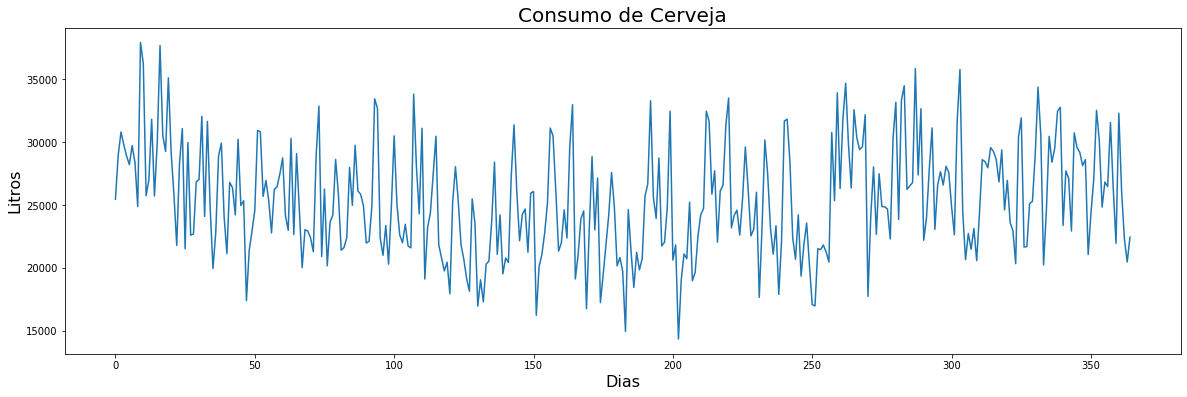

In [7]:
#Variáveis para receber plots de gráficos. Cada variável é indepente da outra
fig1, fig2 = plt.subplots(figsize=(20, 6))   #Define as dimensões dos gráficos

fig2.set_title('Consumo de Cerveja', fontsize=20)  #Título
fig2.set_ylabel('Litros', fontsize=16) #Coluna Y
fig2.set_xlabel('Dias', fontsize=16)   #Coluna X    
fig2 = dados['consumo'].plot()


## Box Plot

In [8]:
import seaborn as sns

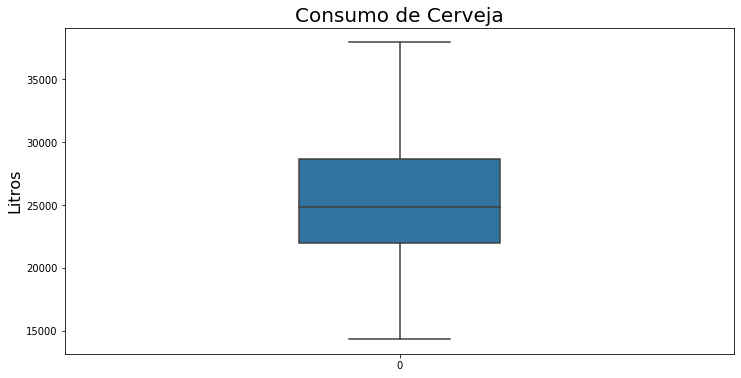

In [9]:
#Boxplot da coluna 'consumo'
ax = sns.boxplot(data=dados['consumo'],
            width=0.3)

ax.figure.set_size_inches(12, 6)   #Dimensões do quadro
ax.set_title('Consumo de Cerveja', fontsize=20)  #Título
ax.set_ylabel('Litros', fontsize=16) #Eixo Y

ax

## Distribuição de frequências da variável dependente (y)


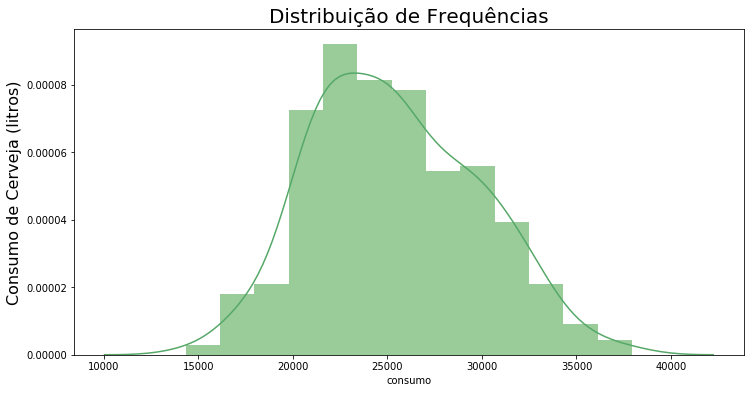

In [10]:
ax = sns.distplot(dados['consumo'], color="g")   #Gráfico de distribuição (cor verde)
sns.set()  #Colocar grades no fundo do gráfico

ax.figure.set_size_inches(12, 6)   #Dimensões do quadro
ax.set_title('Distribuição de Frequências', fontsize=20)  #Título
ax.set_ylabel('Consumo de Cerveja (litros)', fontsize=16) #Eixo Y

ax

## Gráficos de dispersão entre as variáveis do dataset

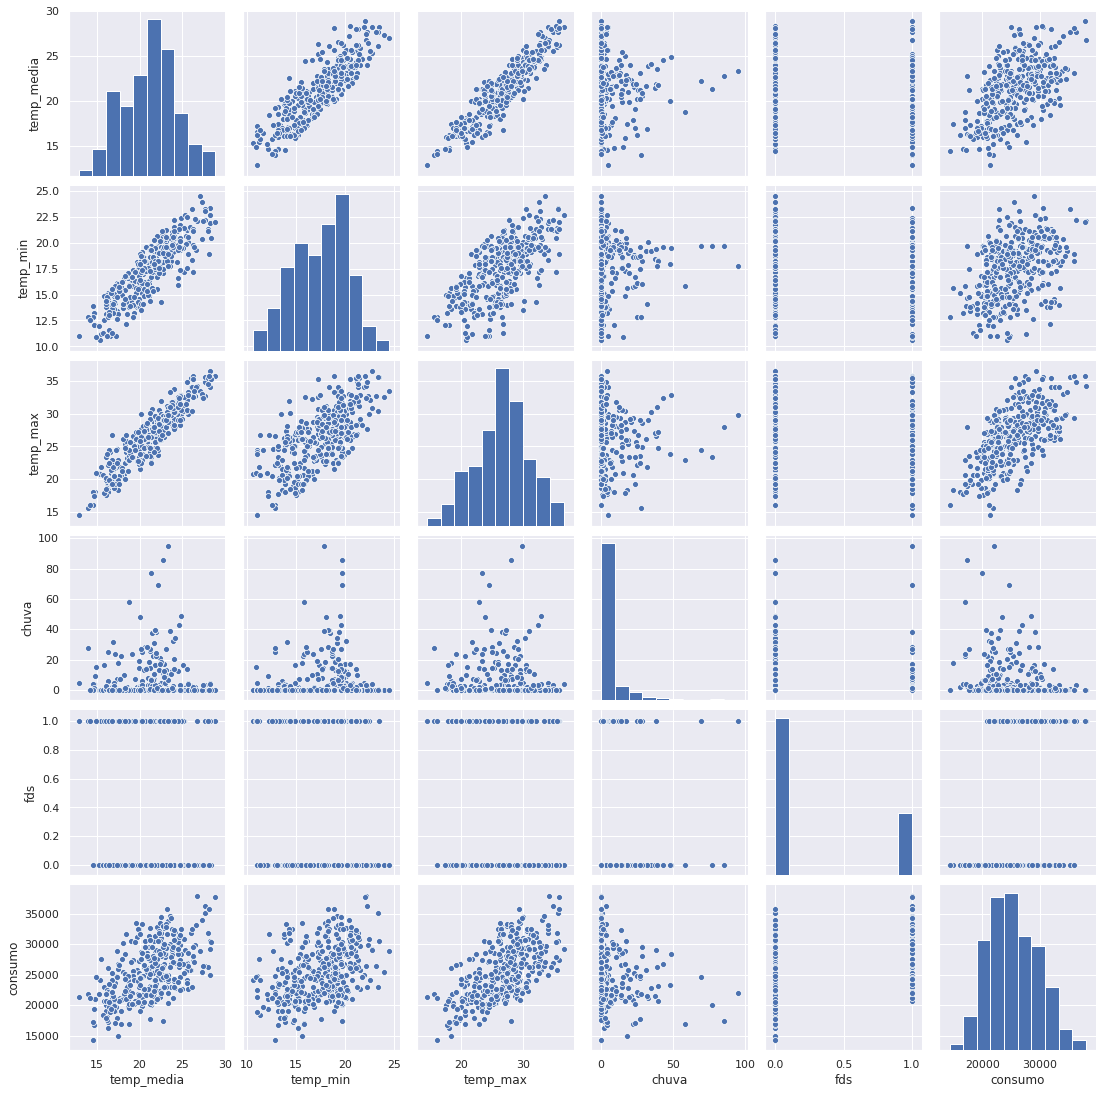

In [11]:
ax = sns.pairplot(dados)

### Pairplot fixando a variável no eixo y

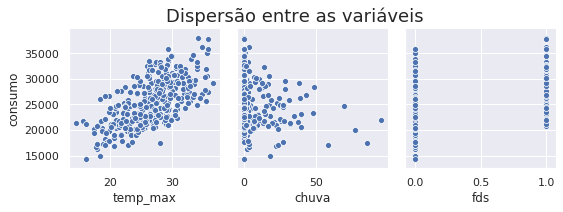

In [12]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)   #Setar um título na parte superior do gráfico e também definir sua altura (y)
ax

In [13]:
#Observa-se que:
#Há uma subida no consumo conforme o aumento da temperatura
#O consumo é maior quando não há chuva e, conforme o aumento da mesma, há uma queda no consumo
#A dispersão do fim de semana tem esse comportamento, somente nos dois extremos, por ser uma variável booleana. Porém, observa-se que no fim de semana, o consumo é mais elevado

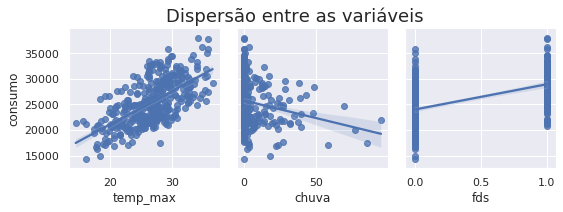

In [14]:
#Traçar a reta de regressão (atributo 'reg')
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)   #Setar um título na parte superior do gráfico e também definir sua altura (y)
ax

### Utilizando lmplot (plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas)

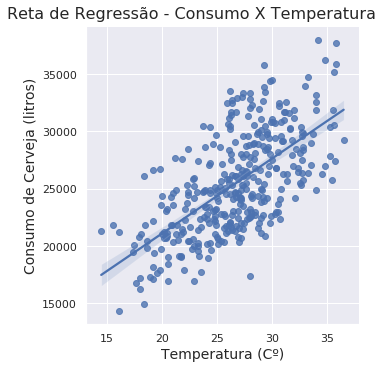

In [15]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura (Cº)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax

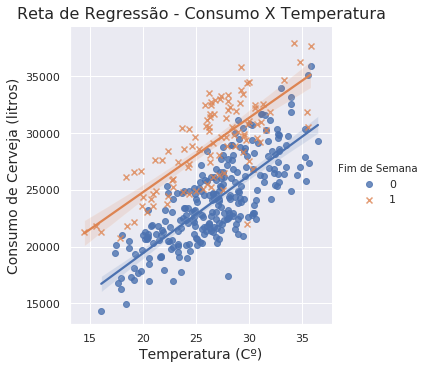

In [16]:
#lmplot com uma terceira variável, gerando duas retas de regressão
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', 'x'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura (Cº)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

In [17]:
#Percebe-se que o consumo é maior no fim de semana

# Estimando um modelo de Regressão Linear para o Consumo

In [18]:
#Importando o módulo de treino/teste da biblioteca scikit-learn
from sklearn.model_selection import train_test_split

In [19]:
#Criando uma Series para armazenar a variável dependente (eixo y)
y = dados['consumo']

In [20]:
#Criando um Dataframe para armazenar as variáveis explicativas (eixo x)
x = dados[['temp_max', 'chuva', 'fds']]

In [21]:
#Criando os datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [22]:
X_train.shape  
#70%

(255, 3)

In [23]:
X_test.shape
#30%

(110, 3)

In [24]:
X_train.shape[0] +  X_test.shape[0]
#365 dias do ano

365

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
modelo = LinearRegression()

In [27]:
#Estimando o modelo com os dados de treino, utilizando o método fit()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coeficiente de Determinação - R²
É uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. Valor entre 0 e 1

In [28]:
#Coeficiente de determinação dos dados de treino
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))  #Método score é usado para obter o R²

R² = 0.73


In [29]:
#Gerando previsões para os dados de teste, utilizando o método predict()
y_previsto = modelo.predict(X_test)

In [30]:
#Obtendo o coeficiente de determinação (R²) para as previsões do modelo, utilizando o metrics e o y_previsto
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))
#Coeficiente dos dados de teste

R² = 0.69


## Obtendo previsões pontuais

In [31]:
#Primeira linha do DataFrame de teste
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [32]:
#Gerando previsão para os elementos da primeira posição do dataframe (entrada)
modelo.predict(entrada).round(2)[0]

26094.9

A previsão acima diz que em um dia com a temperatura máxima de 30.5C°, não sendo num fim de semana e com uma escala de chuva de 12.2, o consumo médio de cerveja neste mesmo dia será de 26094.9 litros

### Criando um simulador simples

In [33]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada=[[temp_max, chuva, fds]]

print('{:.2f} litros no dia'.format(modelo.predict(entrada)[0]))

26094.90 litros no dia


### Obtendo o Intercepto
O intercepto representa o efeito médio em Y (consumo de cerveja) quando as variáveis explicativas (temperatura máxima, chuva, fim de semana) são iguais a zero.

In [34]:
modelo.intercept_
#O consumo médio de cerveja, independente da influência de outras é variáveis, é de 5951 litros

5951.9763393124485

In [35]:
type(modelo.intercept_)

numpy.float64

### Obtendo os coeficientes de regressão
Avalia o efeito "direto" ou "líquido" que uma variável(x) tem sobre a variável dependente(y). As outras variáveis explicativas(x) se matém constantes.

In [36]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [37]:
type(modelo.coef_)

numpy.ndarray

## Armazenando os coeficientes do modelo

In [38]:
indice = ['Intercepto', 'Temperatura Máxima', 'Chuva(mm)', 'Fim de Semana']

In [39]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=indice, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva(mm),-60.782435
Fim de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# Análises gráficas das previsões do modelo

In [40]:
y_previsto_treino = modelo.predict(X_train)

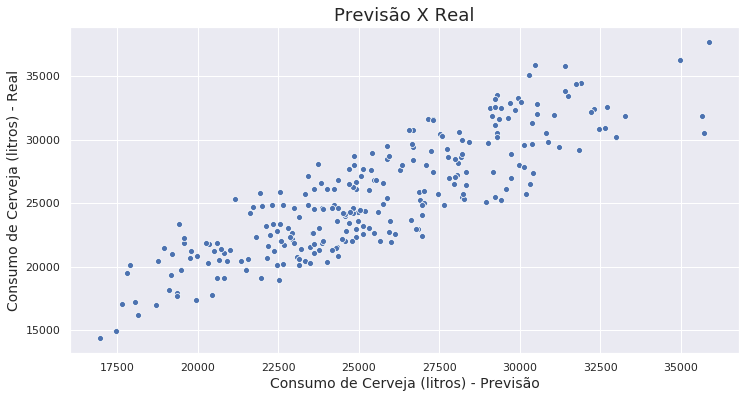

In [41]:
#Gráfico de dispersão entre o valor estimado e valor real
ax = sns.scatterplot(x=y_previsto_treino, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [42]:
#Obtendo os resíduos
residuo = y_train - y_previsto_treino

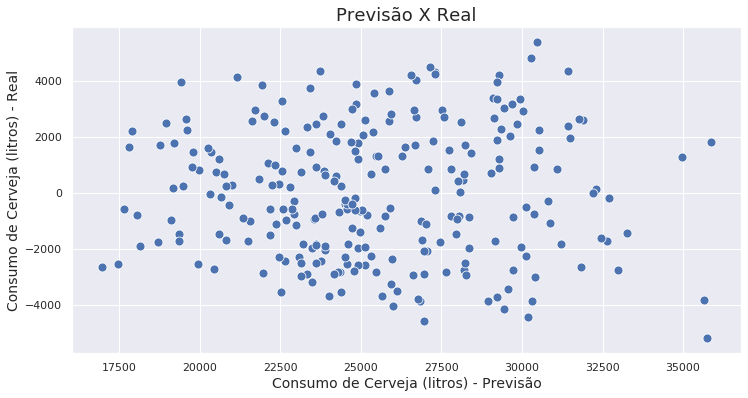

In [43]:
#Gráfico de dispersão entre o valor estimado e resíduos
ax = sns.scatterplot(x=y_previsto_treino, y=residuo, s=80)  # parametro s: tamanho das bolinhas
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

Para a validação do modelo de regressão, os resíduos devem ter a variação constante (chamado de homocedasticidade). No gráfico acima, percebe-se que a variação dos resídeuos (erros) oscila muito conforme o aumento dos valores

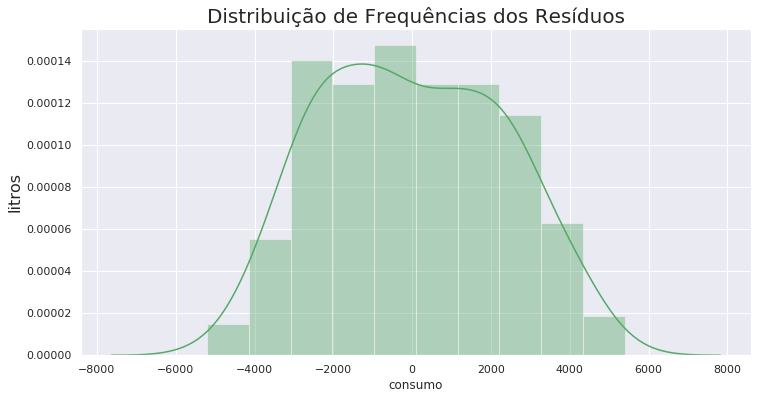

In [44]:
#Distribuição de frequências dos resíduos
ax = sns.distplot(residuo, color="g")   #Gráfico de distribuição (cor verde)

ax.figure.set_size_inches(12, 6)   #Dimensões do quadro
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=20)  #Título
ax.set_ylabel('litros', fontsize=16) #Eixo Y

ax

## Comparando Modelos

In [45]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [46]:
# Novo modelo utilizando Temperatura Média ao invés da Máxima
X2 = dados[['temp_media', 'chuva', 'fds']]

In [47]:
#Dividindo os dados de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [48]:
#Instanciando novo objeto modelo
modelo_2 = LinearRegression()

In [49]:
#Estimar modelo usando os dados de treino
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#Coeficiente de determinação 
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))  #Método score é usado para obter o R²

Modelo com Temp. Média
R² = 0.66


In [51]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


Quanto mais próximo de 1, melhor é o ajuste do modelo

In [52]:
#Gerando previsões para os dados de Teste
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [53]:
#Coeficiente de determinação para as previsões
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))  

Modelo com Temp. Média
R² = 0.66


In [54]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))  

Modelo com Temp. Máxima
R² = 0.69


Percebe-se que o modelo utilizando a variável Temperatura Máxima é mais próximo de 1, portanto, possui melhor ajuste.